In [2]:
from nolitsa import delay, dimension
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [41]:
lorenze_df = pd.read_csv('../data/lorenze_attractor.csv', index_col=0)

In [78]:
lorenze_df.head()

,X,Y,Z,U,t
0,0.000000,1.000000,20.000000,0.0000,0.00000
1,0.002497,0.999753,19.986685,0.0005,0.00025
2,0.004986,0.999510,19.973366,0.0010,0.00050
3,0.007469,0.999273,19.960056,0.0015,0.00075
4,0.009945,0.999041,19.946756,0.0020,0.00100


In [80]:
print(lorenze_df[['U', 't']].head(10))
print(f"\nU adımı: {lorenze_df['U'].diff().iloc[1]}")
print(f"t adımı: {lorenze_df['t'].diff().iloc[1]}")

        U        t
0  0.0000  0.00000
1  0.0005  0.00025
2  0.0010  0.00050
3  0.0015  0.00075
4  0.0020  0.00100
5  0.0025  0.00125
6  0.0030  0.00150
7  0.0035  0.00175
8  0.0040  0.00200
9  0.0045  0.00225

U adımı: 0.0005000024998041
t adımı: 0.0002500012500062


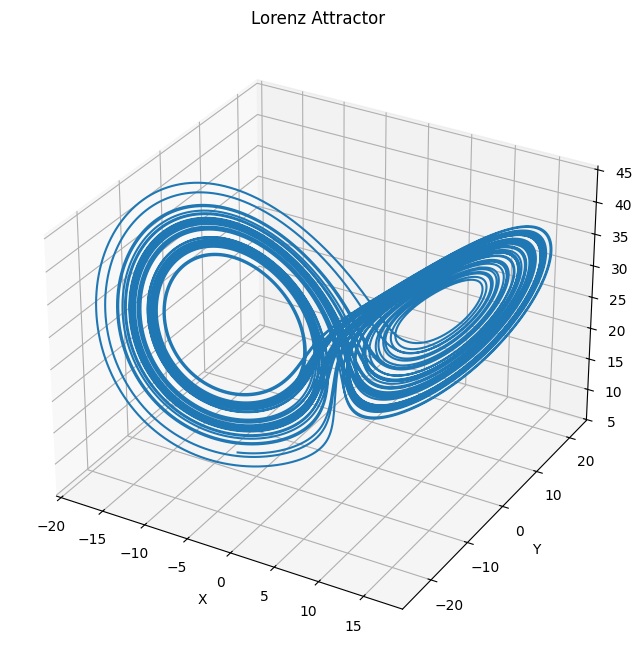

In [94]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenze_df['X'], lorenze_df['Y'], lorenze_df['Z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

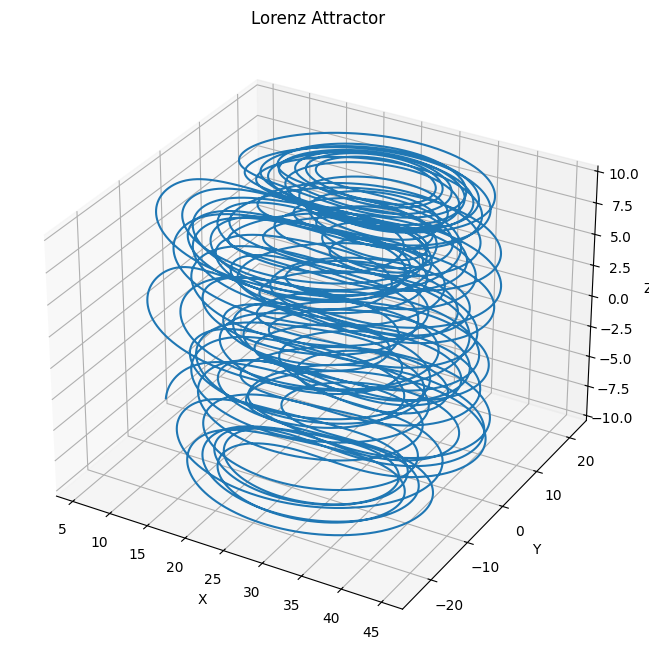

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenze_df['Z'], lorenze_df['Y'], lorenze_df['U'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

In [88]:
lorenze_df['U'].describe()

count    200000.000000
mean          1.839049
std           6.658498
min         -10.000000
25%          -3.945791
50%           3.153164
75%           8.109591
max          10.000000
Name: U, dtype: float64

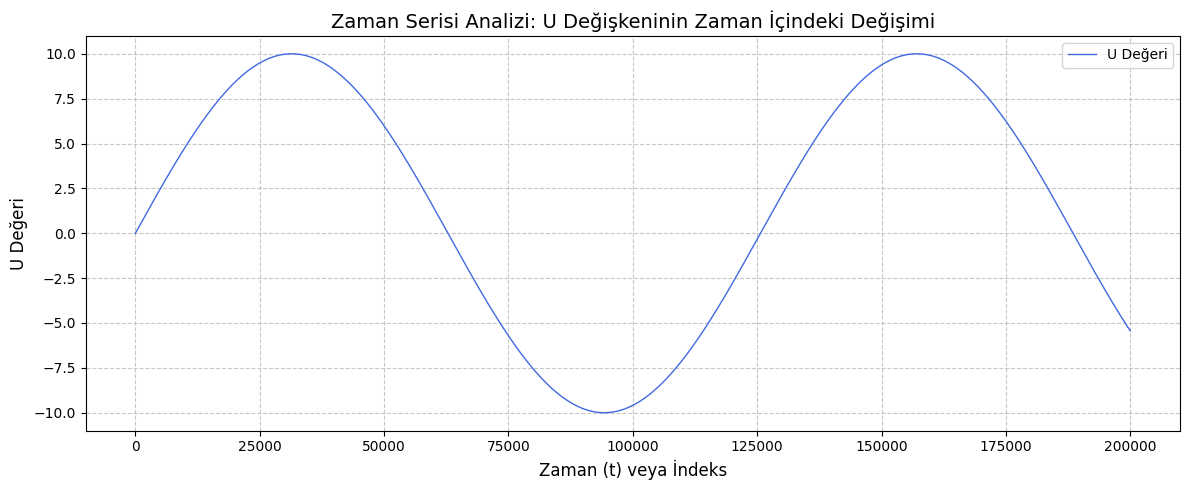

In [93]:
import matplotlib.pyplot as plt

# Grafiğin genel stili
plt.figure(figsize=(12, 5))

# T ve U sütunlarını çizdirelim
# Not: Eğer datasetinde 'T' sütunu yoksa lorenze_df.index kullanabilirsin
plt.plot(lorenze_df.index, lorenze_df['U'], color='royalblue', linewidth=1, label='U Değeri')

# Grafik detayları
plt.title('Zaman Serisi Analizi: U Değişkeninin Zaman İçindeki Değişimi', fontsize=14)
plt.xlabel('Zaman (t) veya İndeks', fontsize=12)
plt.ylabel('U Değeri', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

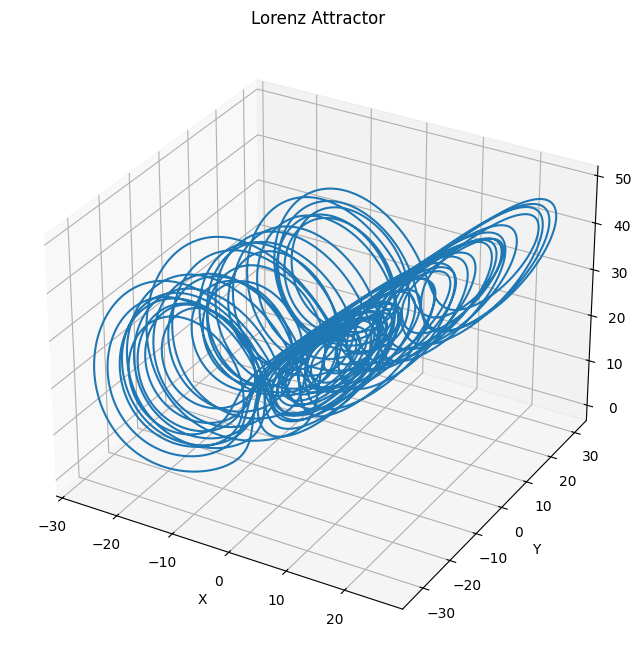

In [95]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenze_df['X'] - lorenze_df['U'], lorenze_df['Y'] - lorenze_df['U'], lorenze_df['Z'] - lorenze_df['U'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

In [43]:
maxtau = 1000
tau_search = np.arange(maxtau)
i = delay.dmi(lorenze_df['X'], maxtau=maxtau)

In [44]:
np.where(np.diff(i) > 0)

(array([627, 629, 632, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643,
        644, 645, 647, 654, 655, 656, 657, 658, 659, 660, 662, 664, 665,
        666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678,
        679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691,
        692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
        705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717,
        718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730,
        731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743,
        744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756,
        757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769,
        770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782,
        783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
        796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
        809, 810, 811, 812, 813, 814, 815, 816, 817

In [45]:
tau = np.where(np.diff(i) > 0)[0][0]
print(f"için Önerilen Tau (AMI): {tau}")

için Önerilen Tau (AMI): 627


In [46]:
dim = np.arange(1, 10)

In [47]:
def plot_chaos_parameters(name, signal, tau_search, ami_values, threshold, tau_opt, dims, fnn_values, m_opt):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'{name} - Kaos Analizi Parametre Seçimi', fontsize=16)

    # --- 1. AMI Plot ---
    # ACF tarzı yatay eşik çizgisi
    ax1.axhline(y=threshold, color='green', linestyle='--', label='1/e Eşiği (Traditional)')


    # Eğer R 14 sonucunu verdiyse, o noktayı işaretleyelim
    ax1.axvline(x=tau_opt, color='r', linestyle='--', label=f'Belirlenen Tau {tau_opt}')
    ax1.plot(tau_search, ami_values, 'b-', linewidth=2, label='AMI Değeri')
    ax1.plot(tau_opt, ami_values[tau_opt], 'ro', markersize=8, label=f'Optimal Tau = {tau_opt}')
    ax1.set_title('Average Mutual Information (Gecikme Seçimi)')
    ax1.set_xlabel('Gecikme (Tau)')
    ax1.set_ylabel('Karşılıklı Bilgi (AMI)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # --- 2. FNN Plot ---
    ax2.plot(dims, fnn_values * 100, 'go-', linewidth=2, label='FNN Oranı')
    ax2.axhline(y=1, color='r', linestyle=':', label='%1 Eşiği')
    ax2.plot(m_opt, fnn_values[m_opt-1] * 100, 'rs', markersize=8, label=f'Optimal m = {m_opt}')
    ax2.set_title('False Nearest Neighbors (Boyut Seçimi)')
    ax2.set_xlabel('Boyut (m)')
    ax2.set_ylabel('Yalancı Komşu Oranı (%)')
    ax2.set_yscale('log') # Küçük değerleri görmek için logaritmik ölçek
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [48]:
def corr_plot(name, y_label_title, tau_search, corr_values, threshold, tau_opt, output_path ):
    plt.figure(figsize=(10, 6))
    plt.title(f'{name} - Kaos Analizi Parametre Seçimi', fontsize=16)
    if threshold:
        plt.axhline(y=threshold, color='green', linestyle='--', label='1/e Eşiği (Traditional)')
    plt.axvline(x=tau_opt, color='r', linestyle='--', label=f'Belirlenen Tau {tau_opt}')
    plt.plot(tau_search, corr_values, 'b-', linewidth=2, label='Correlation Value')
    plt.plot(tau_opt, corr_values[tau_opt], 'ro', markersize=8, label=f'Optimal Tau = {tau_opt}')
    plt.xlabel('Gecikme (Tau)')
    plt.ylabel(y_label_title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [49]:
def fnn_plot(name, dims, fnn_values, m_opt, output_path):
    plt.figure(figsize=(10, 6))
    plt.title(f'{name} - False Nearest Neighbors (Boyut Seçimi)', fontsize=16)
    plt.plot(dims, fnn_values * 100, 'go-', linewidth=2, label='FNN Oranı')
    plt.axhline(y=1, color='r', linestyle=':', label='%1 Eşiği')
    plt.plot(m_opt, fnn_values[m_opt-1] * 100, 'rs', markersize=8, label=f'Optimal m = {m_opt}')
    plt.xlabel('Boyut (m)')
    plt.ylabel('Yalancı Komşu Oranı (%)')
    plt.yscale('log') # Küçük değerleri görmek için logaritmik ölçek
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [63]:
signals = {"X": lorenze_df['X'],
              "Y": lorenze_df['Y'],
              "Z": lorenze_df['Z']} 

In [64]:
def opt_ami(signal,max_tau, local_min=True):
    ami_values = delay.dmi(signal, maxtau=max_tau)
    if local_min:
        tau_opt = np.where(np.diff(ami_values) > 0)[0][0]
        return ami_values, tau_opt, None, None
    else:
        threshold_ami = ami_values[0] * (1 / np.exp(1))
        idx = np.where(ami_values <= threshold_ami)[0]
        tau_opt = idx[0]
    return ami_values, tau_opt, threshold_ami, idx

def opt_acorr(signal, max_tau):
    tau_acorr = delay.acorr(signal, maxtau=max_tau)
    threshold_tau = tau_acorr[0] * (1 / np.exp(1))
    idx = np.where(tau_acorr <= threshold_tau)[0]
    print(f"idx: {idx}")
    tau_opt = idx[0]
    return tau_acorr, tau_opt, threshold_tau, idx

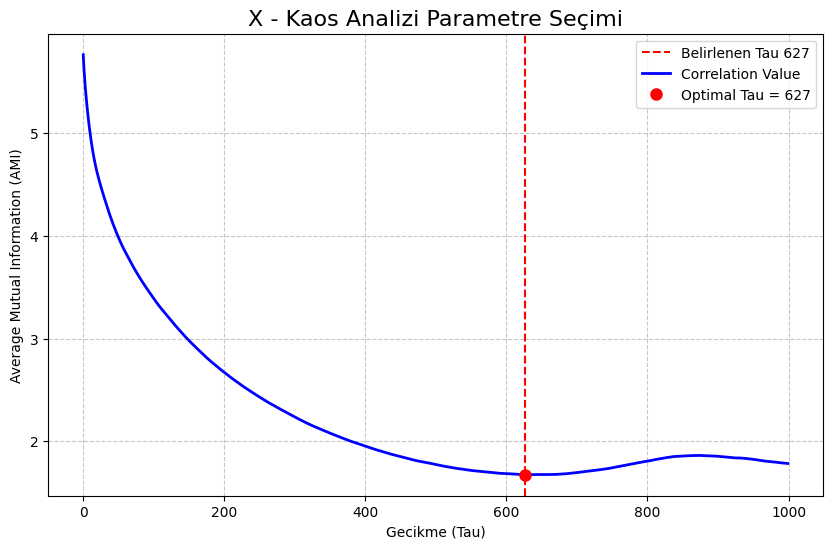

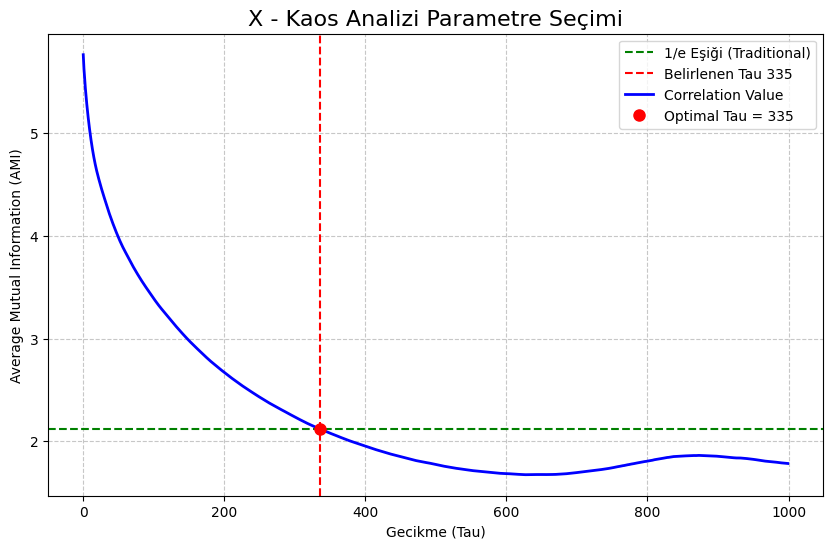

Seçilen: AMI Local Min = 627
Tümü: {'AMI Local Min': np.int64(627), 'AMI Threshold': np.int64(335)}
X için Önerilen Tau (AMI): 627
X İçin Hesaplanan Optimal Boyut (m): 3
FNN Oranları (f1): [0.9996 0.1025 0.0015 0.     0.     0.     0.     0.     0.    ]


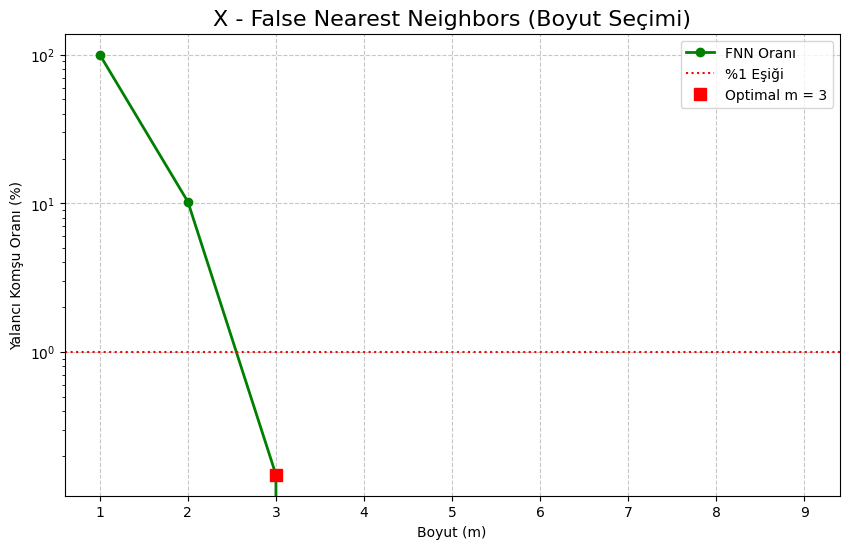

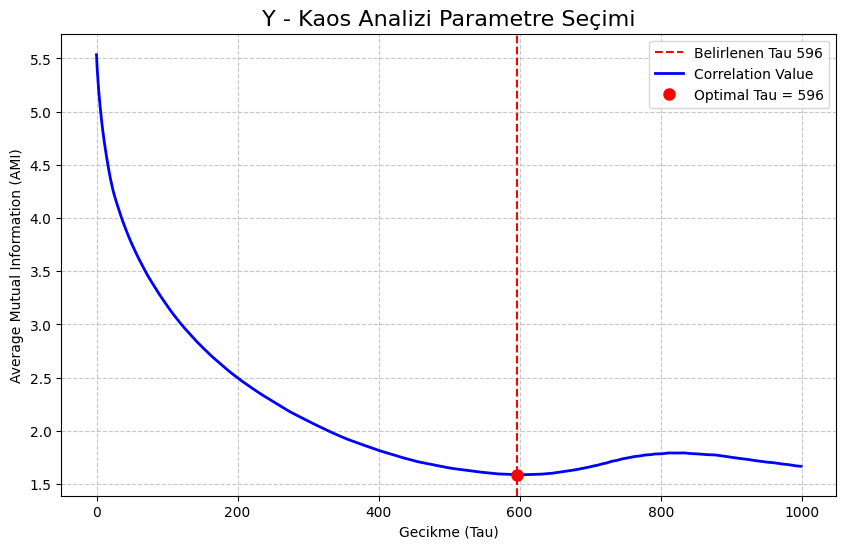

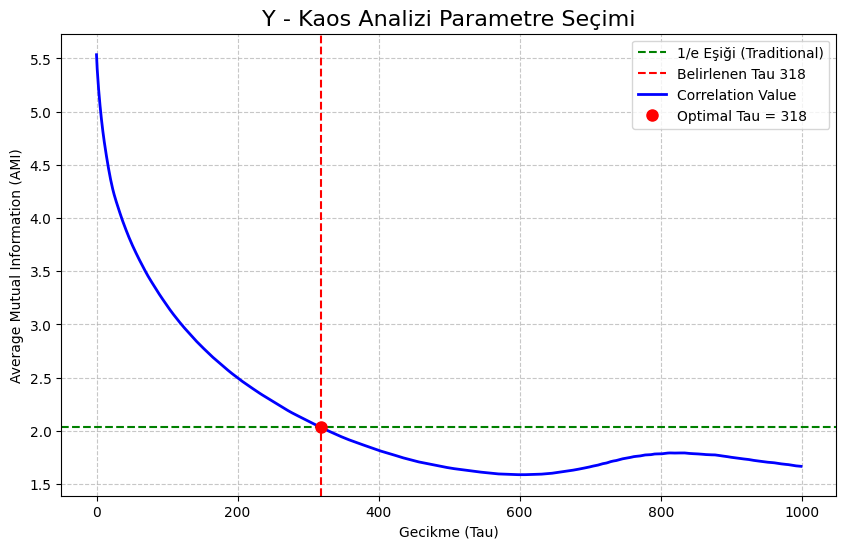

Seçilen: AMI Local Min = 596
Tümü: {'AMI Local Min': np.int64(596), 'AMI Threshold': np.int64(318)}
Y için Önerilen Tau (AMI): 596
Y İçin Hesaplanan Optimal Boyut (m): 4
FNN Oranları (f1): [0.9995 0.2675 0.0166 0.     0.     0.     0.     0.     0.    ]


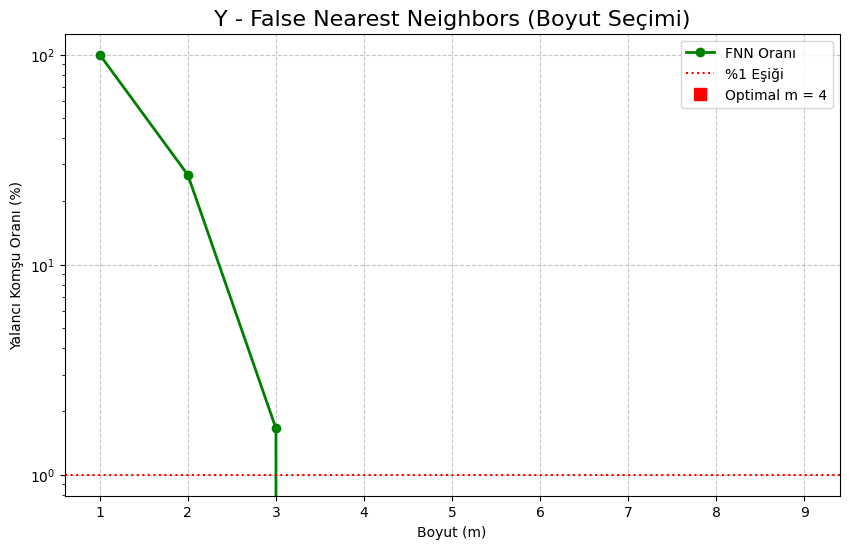

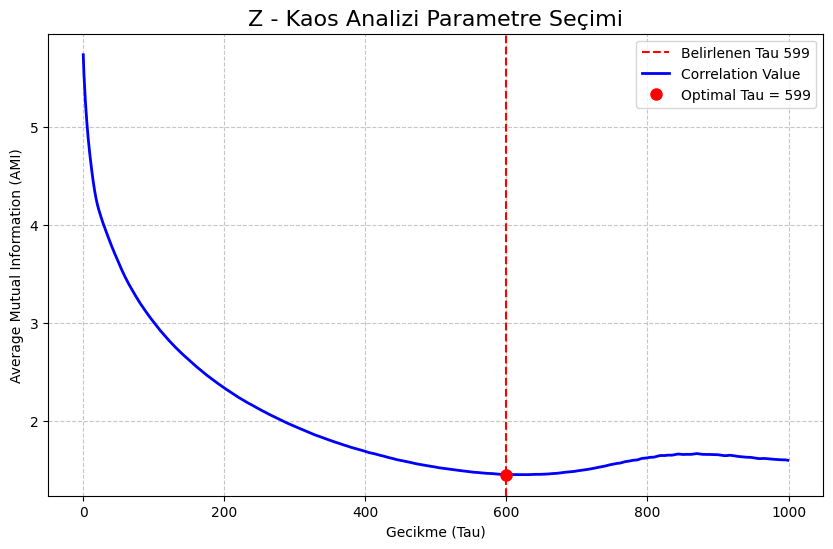

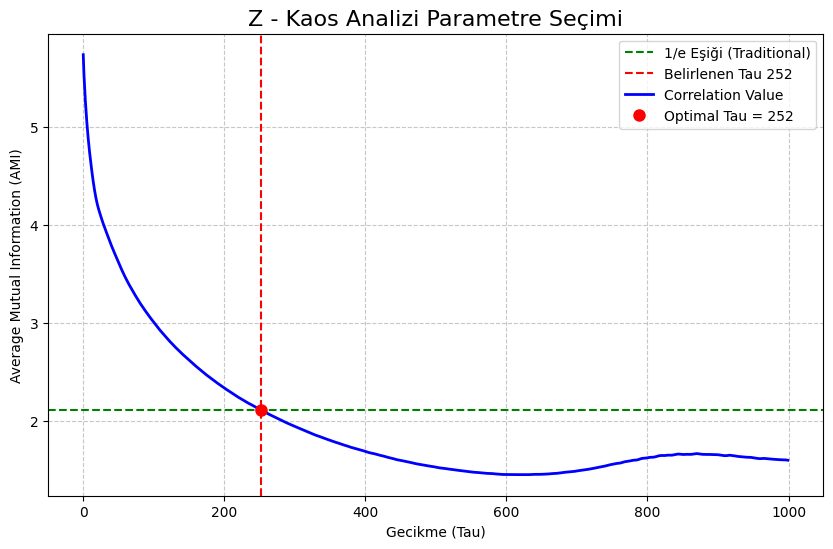

Seçilen: AMI Local Min = 599
Tümü: {'AMI Local Min': np.int64(599), 'AMI Threshold': np.int64(252)}
Z için Önerilen Tau (AMI): 599
Z İçin Hesaplanan Optimal Boyut (m): 6
FNN Oranları (f1): [0.9962 0.2143 0.032  0.0173 0.0155 0.007  0.0064 0.0053 0.0044]


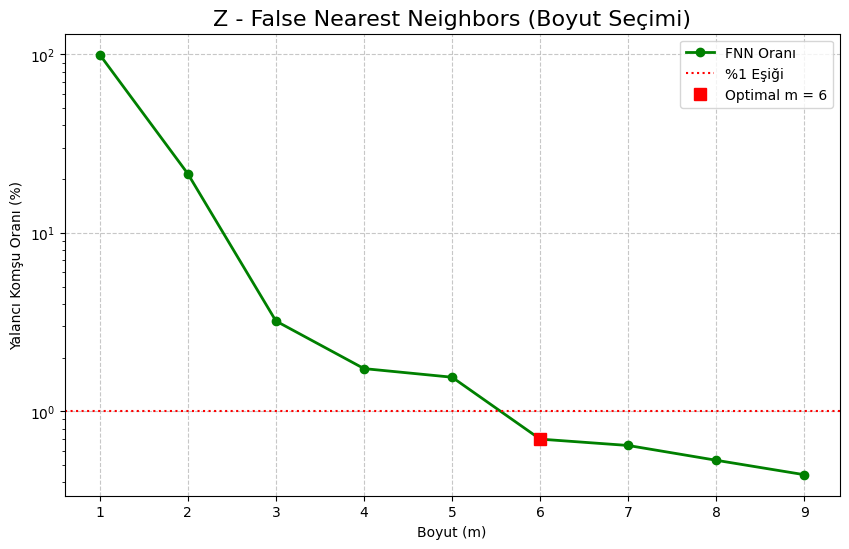

In [96]:
results = {name: {
    'signal': signal,
    'tau': None,
    'm': None,
    'fnn_curve': None
} for name, signal in signals.items()}
for name, signal in signals.items():
    maxtau = 1000
    tau_search = np.arange(maxtau)
    values_local_min, opt_ami_local_min, _, _ = opt_ami(signal, maxtau, local_min=True)
    corr_plot(name, 'Average Mutual Information (AMI)', tau_search, values_local_min, None, opt_ami_local_min, None)    
    values_threshold, opt_ami_threshold, threshold_ami, idx_ami = opt_ami(signal, maxtau, local_min=False)
    corr_plot(name, 'Average Mutual Information (AMI)', tau_search, values_threshold, threshold_ami, opt_ami_threshold, None)

    tau_candidates = {
        'AMI Local Min': opt_ami_local_min,
        'AMI Threshold': opt_ami_threshold,
    }

    # None/invalid olanları filtrele
    valid = {k: v for k, v in tau_candidates.items() if v is not None and v > 0}

    # Minimum olanı bul
    #tau_key = min(valid, key=valid.get)
    #tau_opt = valid[tau_key]
    tau_key = 'AMI Local Min'
    tau_opt = opt_ami_local_min

    

    print(f"Seçilen: {tau_key} = {tau_opt}")
    print(f"Tümü: {tau_candidates}")


    results[name]['tau'] = tau_opt
    print(f"{name} için Önerilen Tau (AMI): {tau_opt}")

    dims = np.arange(1, 10)
    f1, f2, f3 = dimension.fnn(signal, 
                               tau=tau_opt, 
                               dim=dims, 
                               R=10.0, 
                               A=2.0, 
                               window=50, 
                               metric='euclidean', 
                               parallel=True)
    
    # 4. Optimal m değerini belirleme (%1 eşiği)
    # f1 değerinin 0.01'in altına düştüğü ilk indeksi buluyoruz
    threshold = 0.01
    valid_dims = np.where(f1 < threshold)[0]

    
    
    if len(valid_dims) > 0:
        optimal_m = dims[valid_dims[0]]
    else:
        # Eğer %1 altına düşmüyorsa en düşük değeri veren boyutu al
        optimal_m = dims[np.argmin(f1)]
        print(f"Uyarı: {name} için FNN oranı %1'in altına düşmedi. En düşük değer seçildi.")

    

    print(f"{name} İçin Hesaplanan Optimal Boyut (m): {optimal_m}")
    print(f"FNN Oranları (f1): {np.round(f1, 4)}")
    
    # Sonuçları güncelle
    results[name]['m'] = optimal_m
    results[name]['fnn_curve'] = f1

    

    fnn_plot(name, dims, f1, optimal_m, None)

Z için Önerilen Tau (AMI): 252
Z İçin Hesaplanan Optimal Boyut (m): 3
FNN Oranları (f1): [0.9952 0.1076 0.     0.     0.     0.     0.     0.     0.    ]


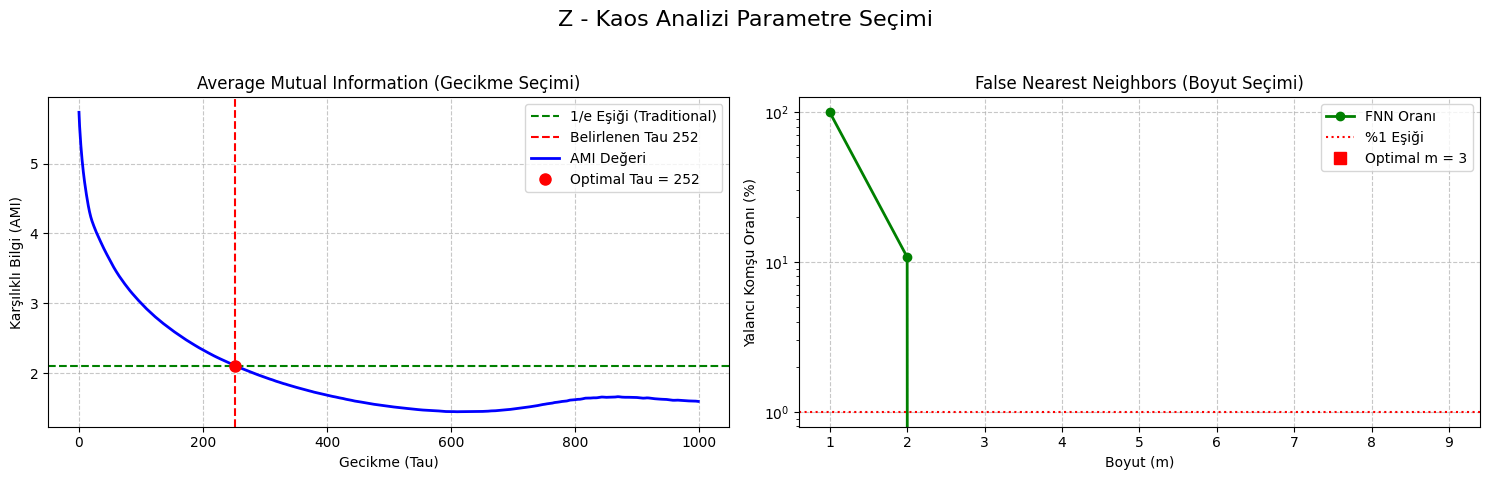

In [ ]:
"""signals = {"Z": lorenze_df['Z']}

results = {name: {
    'signal': signal,
    'tau': None,
    'm': None,
    'fnn_curve': None
} for name, signal in signals.items()}



for name, signal in signals.items():
    maxtau = 1000
    ami_values = delay.dmi(signal, maxtau=maxtau)
    tau_search = np.arange(maxtau)
    tau_opt = np.where(np.diff(ami_values) > 0)[0][0]

    threshold_tau = ami_values[0] * (1 / np.exp(1))

    # İlk kesişim (üstten alta geçiş)
    idx = np.where(ami_values <= threshold_tau)[0]

    if tau_opt > idx[0]:
        tau_opt = idx[0]


    results[name]['tau'] = tau_opt
    print(f"{name} için Önerilen Tau (AMI): {tau_opt}")

    dims = np.arange(1, 10)
    f1, f2, f3 = dimension.fnn(signal, 
                               tau=tau_opt, 
                               dim=dims, 
                               R=10.0, 
                               A=2.0, 
                               window=50, 
                               metric='euclidean', 
                               parallel=True)
    
    # 4. Optimal m değerini belirleme (%1 eşiği)
    # f1 değerinin 0.01'in altına düştüğü ilk indeksi buluyoruz
    threshold = 0.01
    valid_dims = np.where(f1 < threshold)[0]

    
    
    if len(valid_dims) > 0:
        optimal_m = dims[valid_dims[0]]
    else:
        # Eğer %1 altına düşmüyorsa en düşük değeri veren boyutu al
        optimal_m = dims[np.argmin(f1)]
        print(f"Uyarı: {name} için FNN oranı %1'in altına düşmedi. En düşük değer seçildi.")

    

    print(f"{name} İçin Hesaplanan Optimal Boyut (m): {optimal_m}")
    print(f"FNN Oranları (f1): {np.round(f1, 4)}")
    
    # Sonuçları güncelle
    results[name]['m'] = optimal_m
    results[name]['fnn_curve'] = f1

    

    plot_chaos_parameters(name, signal, tau_search, ami_values, threshold_tau, tau_opt, dims, f1, optimal_m)"""

In [119]:
from nolitsa import utils

# Örnek: Z verisi için embedding oluşturma
# results['Z']['tau'] ve results['Z']['m'] değerlerini kullandığımızı varsayalım
tau_z = results['X']['tau']
m_z = results['X']['m']
signal_z = signals['X']
print(f"Embedding için Tau: {tau_z}, Boyut (m): {m_z}")
# Faz Uzayı Rekonstrüksiyonu
reconstructed_z = utils.reconstruct(signal_z, tau=tau_z, dim=m_z)

# Çıktı Shape: (N - (m-1)*tau, m)
# Yani her bir satır, m-boyutlu bir koordinattır.
print(f"Orijinal veri uzunluğu: {len(signal_z)}")
print(f"Embedding sonrası yapı: {reconstructed_z.shape}")

Embedding için Tau: 627, Boyut (m): 3
Orijinal veri uzunluğu: 200000
Embedding sonrası yapı: (198746, 3)


In [120]:
# Embedding sonrası kayıp: (m-1) * tau
offset = (m_z - 1) * tau_z

# Zaman sütunlarını al ve index'i resetle
time_df = lorenze_df.loc[offset:, ['U', 't']].reset_index(drop=True)

# Embedding dataframe
emb_df = pd.DataFrame(reconstructed_z, columns=[f'Z_emb_{i+1}' for i in range(m_z)])

# Uzunlukları kontrol et
print(f"Time df: {len(time_df)}, Emb df: {len(emb_df)}")

# Birleştir
new_df = pd.concat([time_df, emb_df], axis=1)

print(new_df.head())

Time df: 198746, Emb df: 198746
          U         t   Z_emb_1   Z_emb_2   Z_emb_3
0  0.626592  0.313502  0.000000  1.100473  3.832193
1  0.627091  0.313752  0.002497  1.102538  3.840336
2  0.627590  0.314002  0.004986  1.104606  3.848497
3  0.628089  0.314252  0.007469  1.106679  3.856677
4  0.628588  0.314502  0.009945  1.108755  3.864875


In [117]:
new_df

,U,t,X_emb_1,X_emb_2,X_emb_3,X_emb_4,X_emb_5,X_emb_6
1198,0.598645,0.299501,10.105402,19.079213,40.959340,26.685514,18.507154,16.553620
1199,0.599144,0.299751,10.104016,19.122964,40.944754,26.666982,18.497685,16.559981
1200,0.599643,0.300002,10.102653,19.166842,40.930013,26.648472,18.488231,16.566390
1201,0.600142,0.300252,10.101314,19.210848,40.915116,26.629985,18.478790,16.572849
1202,0.600641,0.300502,10.099999,19.254981,40.900066,26.611518,18.469364,16.579357
...,...,...,...,...,...,...,...,...
197000,-4.125679,49.250246,38.576408,28.730278,19.095668,12.824582,8.823015,9.279472
197001,-4.126135,49.250496,38.584912,28.709946,19.082914,12.816129,8.818304,9.291827
197002,-4.126590,49.250746,38.593243,28.689631,19.070169,12.807683,8.813602,9.304258
197003,-4.127046,49.250996,38.601401,28.669334,19.057432,12.799242,8.808908,9.316764


In [98]:
lorenze_df['Z']

0         20.000000
1         19.986685
2         19.973366
3         19.960056
4         19.946756
            ...    
199995     9.279472
199996     9.291827
199997     9.304258
199998     9.316764
199999     9.329346
Name: Z, Length: 200000, dtype: float64

In [99]:
reconstructed_z[:6]

array([[0.00000000e+00, 1.10047336e+00, 3.83219280e+00],
       [2.49657994e-03, 1.10253803e+00, 3.84033594e+00],
       [4.98631461e-03, 1.10460648e+00, 3.84849730e+00],
       [7.46923375e-03, 1.10667872e+00, 3.85667692e+00],
       [9.94536704e-03, 1.10875476e+00, 3.86487483e+00],
       [1.24147441e-02, 1.11083463e+00, 3.87309108e+00]])

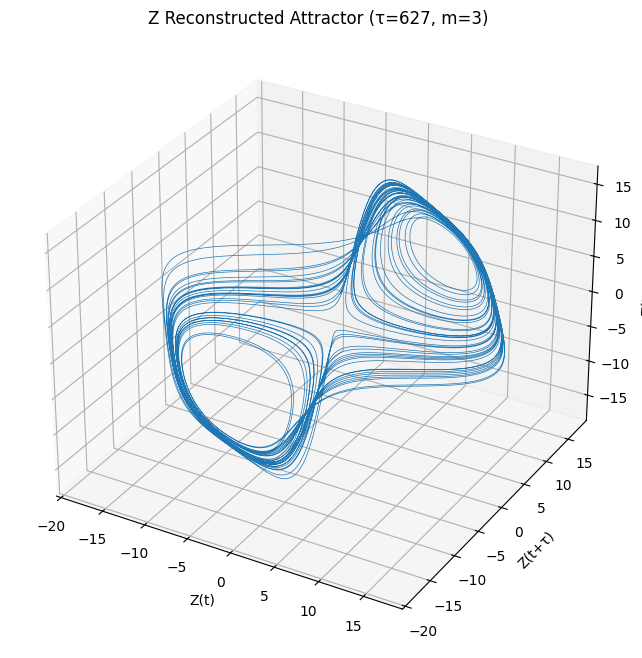

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# İlk üç boyutu çizdirerek sürekliliği sağla
ax.plot(reconstructed_z[:, 0], reconstructed_z[:, 1], reconstructed_z[:, 2], lw=0.5)

ax.set_xlabel('Z(t)')
ax.set_ylabel('Z(t+τ)')
ax.set_zlabel('Z(t+2τ)')
ax.set_title(f'Z Reconstructed Attractor (τ={tau_z}, m={m_z})')

plt.show()

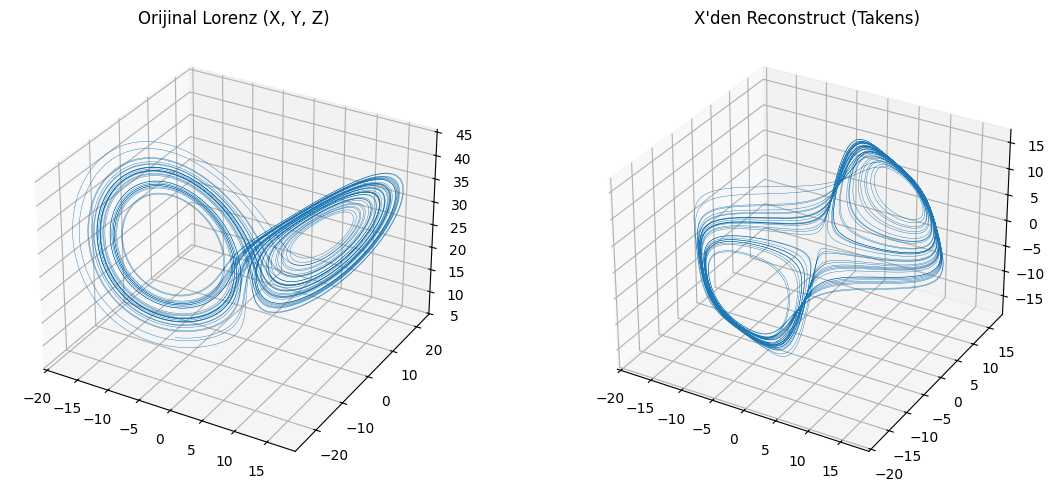

In [103]:
fig = plt.figure(figsize=(12, 5))

# Orijinal 3D Lorenz
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(lorenze_df['X'], lorenze_df['Y'], lorenze_df['Z'], lw=0.3)
ax1.set_title('Orijinal Lorenz (X, Y, Z)')

# Tek değişkenden reconstruct
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(reconstructed_z[:, 0], reconstructed_z[:, 1], reconstructed_z[:, 2], lw=0.3)
ax2.set_title('X\'den Reconstruct (Takens)')

plt.tight_layout()
plt.show()

In [104]:
tau_z = results['Y']['tau']
m_z = results['Y']['m']
signal_z = signals['Y']
print(f"Embedding için Tau: {tau_z}, Boyut (m): {m_z}")
# Faz Uzayı Rekonstrüksiyonu
reconstructed_z = utils.reconstruct(signal_z, tau=tau_z, dim=m_z)

# Çıktı Shape: (N - (m-1)*tau, m)
# Yani her bir satır, m-boyutlu bir koordinattır.
print(f"Orijinal veri uzunluğu: {len(signal_z)}")
print(f"Embedding sonrası yapı: {reconstructed_z.shape}")

Embedding için Tau: 596, Boyut (m): 4
Orijinal veri uzunluğu: 200000
Embedding sonrası yapı: (198212, 4)


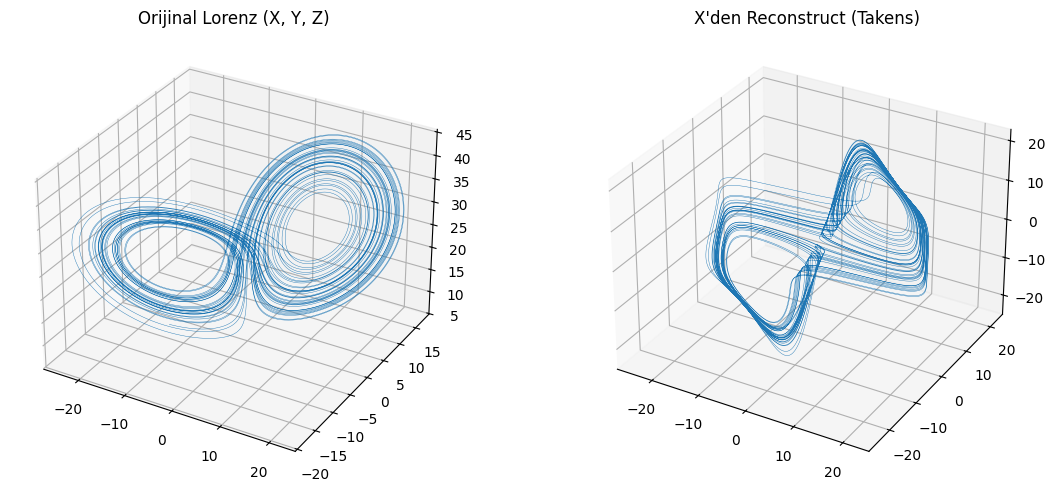

In [105]:
fig = plt.figure(figsize=(12, 5))

# Orijinal 3D Lorenz
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(lorenze_df['Y'], lorenze_df['X'], lorenze_df['Z'], lw=0.3)
ax1.set_title('Orijinal Lorenz (X, Y, Z)')

# Tek değişkenden reconstruct
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(reconstructed_z[:, 0], reconstructed_z[:, 1], reconstructed_z[:, 2], lw=0.3)
ax2.set_title('X\'den Reconstruct (Takens)')

plt.tight_layout()
plt.show()

In [106]:
tau_z = results['Z']['tau']
m_z = results['Z']['m']
signal_z = signals['Z']
print(f"Embedding için Tau: {tau_z}, Boyut (m): {m_z}")
# Faz Uzayı Rekonstrüksiyonu
reconstructed_z = utils.reconstruct(signal_z, tau=tau_z, dim=m_z)

# Çıktı Shape: (N - (m-1)*tau, m)
# Yani her bir satır, m-boyutlu bir koordinattır.
print(f"Orijinal veri uzunluğu: {len(signal_z)}")
print(f"Embedding sonrası yapı: {reconstructed_z.shape}")

Embedding için Tau: 599, Boyut (m): 6
Orijinal veri uzunluğu: 200000
Embedding sonrası yapı: (197005, 6)


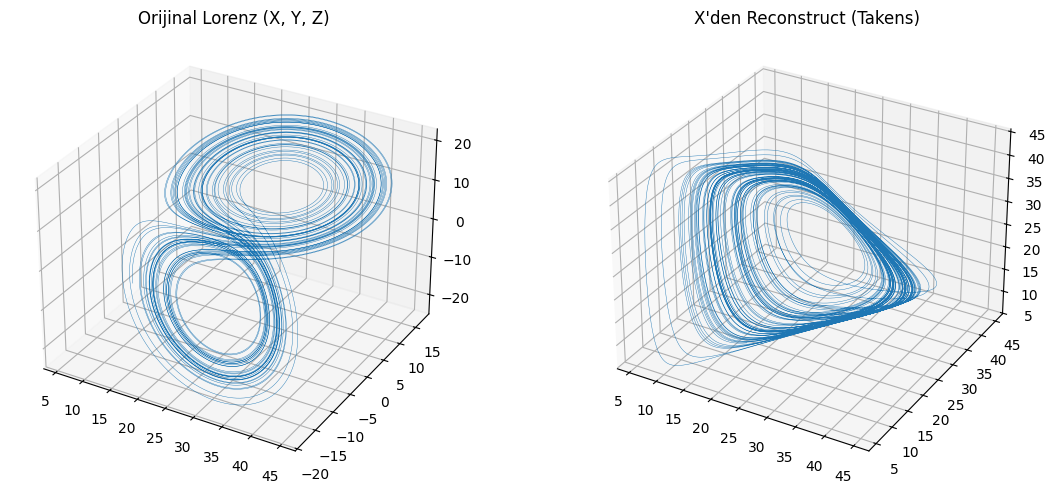

In [108]:
fig = plt.figure(figsize=(12, 5))

# Orijinal 3D Lorenz
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(lorenze_df['Z'], lorenze_df['X'], lorenze_df['Y'], lw=0.3)
ax1.set_title('Orijinal Lorenz (X, Y, Z)')

# Tek değişkenden reconstruct
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(reconstructed_z[:, 0], reconstructed_z[:, 1], reconstructed_z[:, 2], lw=0.3)
ax2.set_title('X\'den Reconstruct (Takens)')

plt.tight_layout()
plt.show()

# Dynamics

KeyboardInterrupt: 

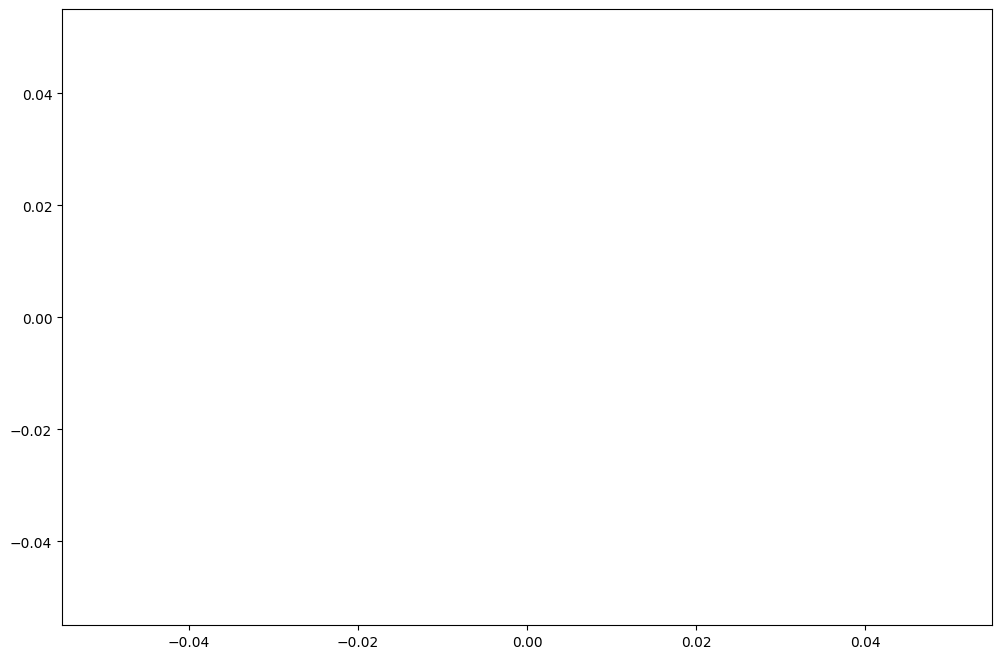

In [59]:
# Veri Hazırlığı (Z ve X seçimi)
df = lorenze_df[['X', 'Z']].copy() # X'i yatay, Z'yi dikey eksen yapalım

# Değişim hızlarını hesapla
df['X_change'] = (df['X'].shift(-1) - df['X'].shift(1)) / 2
df['Z_change'] = (df['Z'].shift(-1) - df['Z'].shift(1)) / 2
plot_df = df.dropna().iloc[::10] # Her 10 noktada bir örnekle (Grafiğin boğulmaması için)

plt.figure(figsize=(12, 8))

# 1. Yoğunluk Haritası (KDE)
sns.kdeplot(
    data=df, x='X', y='Z', 
    fill=True, levels=20, thresh=0.02, cmap="mako", alpha=0.3
)

# 2. Vektör Alanı (Quiver)
# color parametresini değişim hızına (hıza) göre renklendirebiliriz
speed = np.sqrt(plot_df['X_change']**2 + plot_df['Z_change']**2)
quiv = plt.quiver(
    plot_df['X'], plot_df['Z'], 
    plot_df['X_change'], plot_df['Z_change'],
    speed, cmap='autumn_r', alpha=0.8, 
    scale_units='xy', angles='xy', scale=10, # Ölçeği ihtiyaca göre ayarla
    width=0.0015, headwidth=4
)

# 3. Estetik Detaylar
plt.colorbar(quiv, label='Değişim Hızı (Magnitude)')
plt.title('2D Topology Plot - Lorenz X vs. Z (Dynamics Flow)', fontsize=15)
plt.xlabel('X (Popülasyon/Değişken 1)')
plt.ylabel('Z (Popülasyon/Değişken 2)')
#plt.style.use('dark_background') # Kaotik sistemler koyu temada daha net görünür
plt.grid(False)

plt.show()

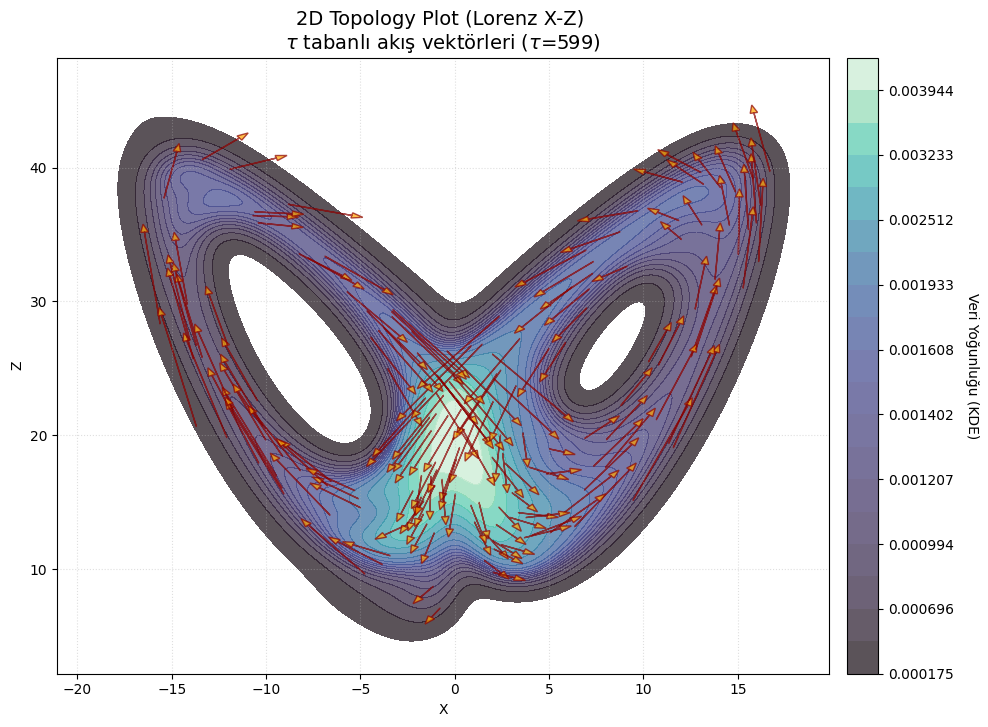

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri Hazırlığı
df = lorenze_df[['X', 'Z']].copy()
# Daha önce hesapladığın tau değerini kullanıyoruz
tau = results['Z']['tau'] 

# Değişimi Tau adımına göre hesapla (Merkezi fark: t+tau ve t-tau arasındaki fark)
df['X_change'] = (df['X'].shift(-tau) - df['X'].shift(tau)) / (2 * tau)
df['Z_change'] = (df['Z'].shift(-tau) - df['Z'].shift(tau)) / (2 * tau)

# Örnekleme: Grafiğin okunabilirliği için her (tau * 2) adımda bir ok çizmek iyi bir kuraldır
plot_df = df.dropna().iloc[::(tau * 2)]

plt.figure(figsize=(12, 8))
scale = 0.5
# 2. Yoğunluk Haritası
ax = plt.gca()
kde = sns.kdeplot(data=df, x='X', y='Z', fill=True, levels=20, thresh=0.02, cmap="mako", alpha=0.7, ax=ax)
mappable = kde.collections[0]

# ✅ GERÇEK yoğunluk colorbar
cbar = plt.colorbar(mappable, ax=ax, pad=0.02)
cbar.set_label('Veri Yoğunluğu (KDE)', rotation=270, labelpad=18)

# 3. Arrow Çizimi
ax = plt.gca()
for i in range(len(plot_df)):
    row = plot_df.iloc[i]
    # Vektör boylarını görsel olarak optimize etmek için tau ile çarpabilirsin 
    # veya olduğu gibi bırakabilirsin
    ax.arrow(
        row['X'], row['Z'], 
        row['X_change'] * tau * scale, row['Z_change'] * tau * scale, 
        head_width=0.4, head_length=0.6, fc='orange', ec='darkred', alpha=0.7,
        length_includes_head=True
    )

plt.title(f'2D Topology Plot (Lorenz X-Z) \n$\\tau$ tabanlı akış vektörleri ($\\tau$={tau})', fontsize=14)
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True, linestyle=':', alpha=0.4)

plt.show()